## Problem 3: How many people live near shopping centers? (8 points)

In the last step of this analysis, use a *spatial join* to relate data from a population grid data set to the buffer layer created in *problem 2* to find out how many people live in all population grid cells that are **within** 1.5 km distance from each shopping centre.

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS).


*Feel free to divide your solution into more codeblocks than prepared! Remember to add comments to your code :)*

### a) Load the population grid data set and the buffer geometries (2 points)

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS). Load the data into a `GeoDataFrame` called `population_grid`.

(optional) If you want, discard unneeded columns and translate the remaining column names from Finnish to English.

In [1]:
import geopandas
import pyproj

shopping_centre_buffers = geopandas.read_file('/content/output.gpkg')
shopping_centre_buffers.head()

,geometry
0,"POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,"POLYGON ((25498049.312 6672862.540, 25498042.0..."
2,"POLYGON ((25487054.265 6671954.969, 25487047.0..."
3,"POLYGON ((25491151.383 6678394.318, 25491144.1..."
4,"POLYGON ((25499601.692 6686561.206, 25499594.4..."


<Axes: >

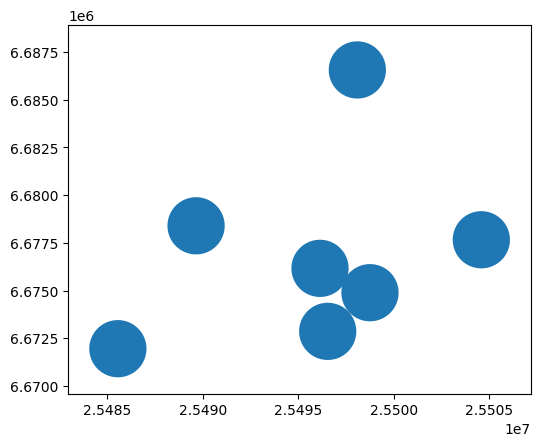

In [2]:
shopping_centre_buffers.plot()

In [3]:
print(shopping_centre_buffers.crs)

EPSG:3879


In [4]:
!pip install certifi
import certifi

In [5]:
import ssl

ssl._create_default_https_context = ssl._create_stdlib_context

In [23]:
# ADD YOUR OWN CODE HERE
ca_bundle = certifi.where()

population_grid = geopandas.read_file(
    (
        "https://kartta.hsy.fi/geoserver/wfs"
        "?service=wfs"
        "&version=2.0.0"
        "&request=GetFeature"
        "&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2020"
        "&srsName=EPSG:3879"
    ),
    ca_bundle=ca_bundle,
)
population_grid.crs = "EPSG:3879"

ERROR:fiona._env:SSL certificate problem: unable to get local issuer certificate


In [24]:
population_grid.head()

,gml_id,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,Vaestotietoruudukko_2020.1,703,5,51,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
1,Vaestotietoruudukko_2020.2,710,8,44,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
2,Vaestotietoruudukko_2020.3,711,5,90,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
3,Vaestotietoruudukko_2020.4,715,13,34,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
4,Vaestotietoruudukko_2020.5,848,5,53,99,99,99,99,99,99,99,99,99,"POLYGON ((25472749.993 6690249.003, 25472749.9..."


In [25]:
# prompt: rename asukkaita to population

population_grid.rename(columns={"asukkaita": "population"}, inplace=True)


In [26]:
population_grid.head()

,gml_id,index,population,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,Vaestotietoruudukko_2020.1,703,5,51,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
1,Vaestotietoruudukko_2020.2,710,8,44,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
2,Vaestotietoruudukko_2020.3,711,5,90,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
3,Vaestotietoruudukko_2020.4,715,13,34,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
4,Vaestotietoruudukko_2020.5,848,5,53,99,99,99,99,99,99,99,99,99,"POLYGON ((25472749.993 6690249.003, 25472749.9..."


<Axes: >

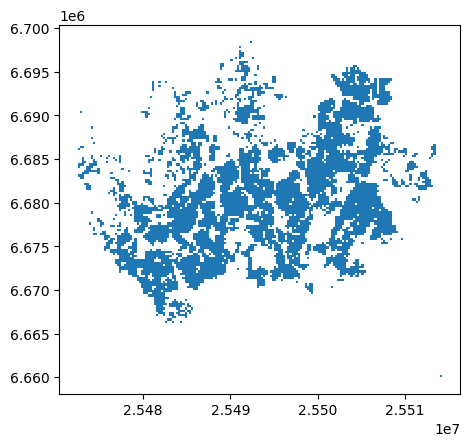

In [12]:
population_grid.plot()

In [27]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import geopandas
import pyproj

assert isinstance(population_grid, geopandas.GeoDataFrame)
assert population_grid.crs == pyproj.CRS("EPSG:3879")



Load the buffers computed in *problem 2* into a `GeoDataFrame` called `shopping_centre_buffers`. Add an `assert` statement to check whether the two data frames are in the same CRS.

In [28]:
# ADD YOUR OWN CODE HERE
shopping_centre_buffers.head()

,geometry
0,"POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,"POLYGON ((25498049.312 6672862.540, 25498042.0..."
2,"POLYGON ((25487054.265 6671954.969, 25487047.0..."
3,"POLYGON ((25491151.383 6678394.318, 25491144.1..."
4,"POLYGON ((25499601.692 6686561.206, 25499594.4..."


In [29]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert isinstance(shopping_centre_buffers, geopandas.GeoDataFrame)
assert shopping_centre_buffers.geometry.geom_type.unique() == ["Polygon"]
assert shopping_centre_buffers.crs == pyproj.CRS("EPSG:3879")


---

### b) Carry out a *spatial join* between the `population_grid` and the `shopping_centre_buffers`  (2 points)

Join the shopping centre’s `id` column (and others, if you want) to the population grid data frame, for all population grid cells that are **within** the buffer area of each shopping centre. [Use a *join-type* that retains only rows from both input data frames for which the geometric predicate is true](https://geopandas.org/en/stable/gallery/spatial_joins.html#Types-of-spatial-joins).


In [37]:
# prompt: Carry out a spatial join between the population_grid and the shopping_centre_buffers (2 points)
# Join the shopping centre’s id column (and others, if you want) to the population grid data frame, for all population grid cells that are within the buffer area of each shopping centre. Use a join-type that retains only rows from both input data frames for which the geometric predicate is true.

joined_data = geopandas.sjoin(
    population_grid,
    shopping_centre_buffers,
    how="inner",
    op="within",
)



/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,gml_id,index,population,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry,index_right
1148,Vaestotietoruudukko_2020.1149,8372,81,57,99,99,99,99,99,99,99,99,99,"POLYGON ((25484250.000 6672249.006, 25484250.0...",2
1149,Vaestotietoruudukko_2020.1150,8374,20,61,99,99,99,99,99,99,99,99,99,"POLYGON ((25484250.000 6671748.997, 25484250.0...",2
1211,Vaestotietoruudukko_2020.1212,8532,110,50,14,20,2,10,15,24,7,15,3,"POLYGON ((25484499.998 6672749.004, 25484499.9...",2
1212,Vaestotietoruudukko_2020.1213,8533,136,53,18,28,7,10,25,21,15,11,1,"POLYGON ((25484499.998 6672499.005, 25484499.9...",2
1213,Vaestotietoruudukko_2020.1214,8534,89,50,99,99,99,99,99,99,99,99,99,"POLYGON ((25484499.998 6672249.006, 25484499.9...",2


In [39]:
joined_data.tail()


,gml_id,index,population,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry,index_right
5287,Vaestotietoruudukko_2020.5288,22121,344,32,30,14,26,40,60,37,58,51,28,"POLYGON ((25505499.998 6677498.998, 25505499.9...",0
5288,Vaestotietoruudukko_2020.5289,22122,340,37,17,9,42,54,41,44,33,43,57,"POLYGON ((25505499.998 6677248.998, 25505499.9...",0
5342,Vaestotietoruudukko_2020.5343,22282,369,33,30,42,39,51,60,59,45,23,20,"POLYGON ((25505749.995 6677748.997, 25505749.9...",0
5343,Vaestotietoruudukko_2020.5344,22283,130,38,7,1,10,29,22,14,20,18,9,"POLYGON ((25505749.995 6677498.998, 25505749.9...",0
5344,Vaestotietoruudukko_2020.5345,22284,202,37,4,6,17,28,13,17,38,43,36,"POLYGON ((25505749.995 6677248.998, 25505749.9...",0


<Axes: >

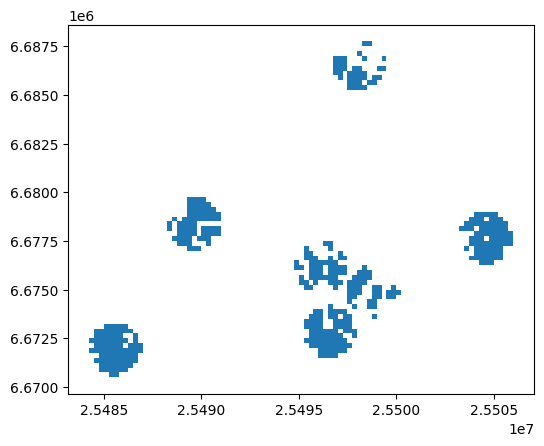

In [38]:
joined_data.plot()

In [41]:
# prompt: uniayq values of index colloumn

joined_data.index_right.unique()


array([2, 3, 6, 1, 4, 5, 0])

In [43]:
data = joined_data.groupby("index_right")

index_right
0       Axes(0.22375,0.11;0.5775x0.77)
1       Axes(0.22375,0.11;0.5775x0.77)
2       Axes(0.22375,0.11;0.5775x0.77)
3       Axes(0.22375,0.11;0.5775x0.77)
4    Axes(0.194875,0.11;0.635249x0.77)
5       Axes(0.22375,0.11;0.5775x0.77)
6    Axes(0.194874,0.11;0.635252x0.77)
dtype: object

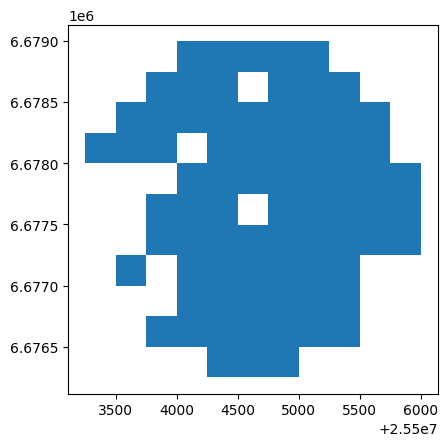

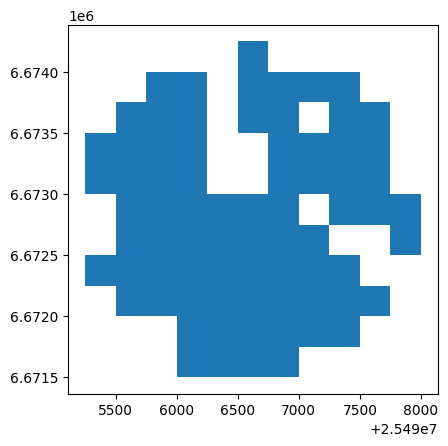

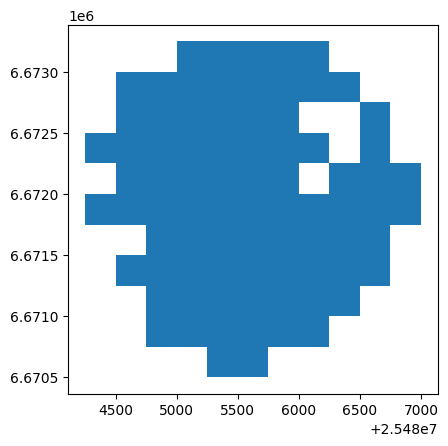

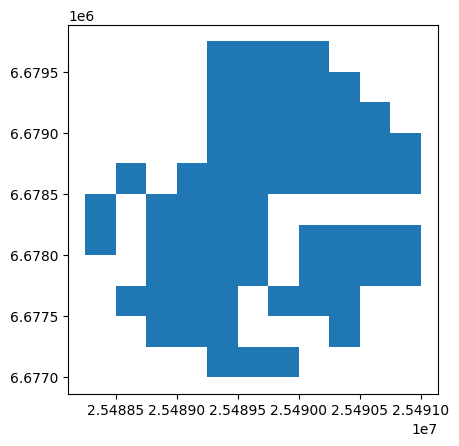

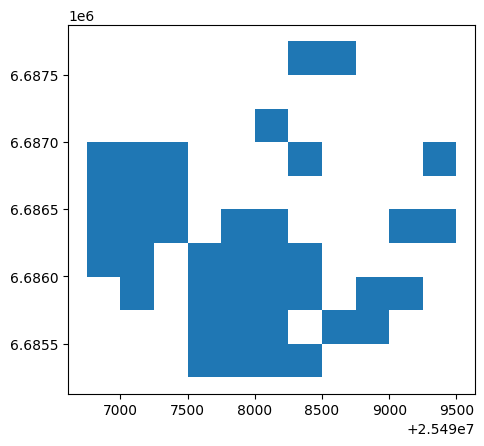

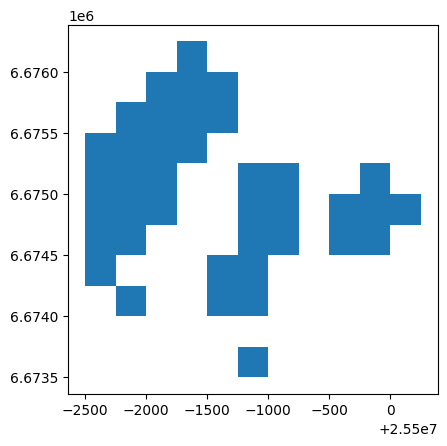

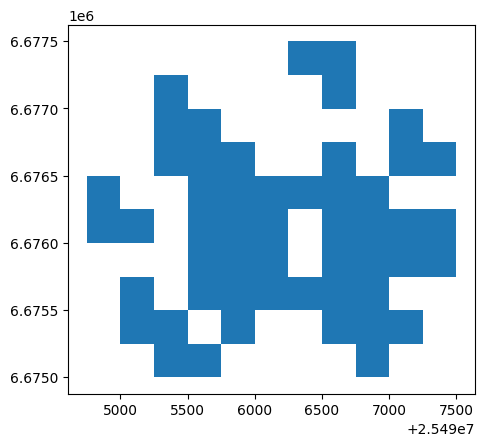

In [55]:
data.plot()


---

### c) Compute the population sum around shopping centres (2 points)

Group the resulting (joint) data frame by shopping centre (`id` or `name`), and calculate the `sum()` of the population living inside the 1.5 km radius around them.

Print the results, for instance, in the form "12345 people live within 1.5 km from REDI".

In [57]:
# ADD YOUR OWN CODE HERE
data['population'].sum()

index_right
0    20889
1    56851
2    26268
3    25059
4    10956
5    27523
6    24336
Name: population, dtype: int64

In [58]:
for index_right, population in data['population'].sum().items():
    print(f"{population} people live within 1.5 km from shopping centre {index_right}")

20889 people live within 1.5 km from shopping centre 0
56851 people live within 1.5 km from shopping centre 1
26268 people live within 1.5 km from shopping centre 2
25059 people live within 1.5 km from shopping centre 3
10956 people live within 1.5 km from shopping centre 4
27523 people live within 1.5 km from shopping centre 5
24336 people live within 1.5 km from shopping centre 6


In [ ]:
# prompt: Group the resulting (joint) data frame by shopping centre (id or name), and calculate the sum() of the population living inside the 1.5 km radius around them.
# Print the results, for instance, in the form "12345 people live within 1.5 km from REDI".

grouped_data = joined_data.groupby("index_right")
population_sum = grouped_data["population"].sum()

for shopping_centre_id, population in population_sum.items():
    print(f"{population} people live within 1.5 km from shopping centre {shopping_centre_id}")



---

### d) Reflection

Good job! You are almost done with this week’s exercise. Please quickly answer the following short questions:
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

Add your answers in a new *Markdown* cell below: